# Circular Seperability Filter vs Hough Circle Detection

> A comparison between the Circular Seperability Filter and Hough Circle Detection method.

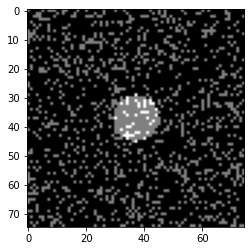

In [ ]:
import glob
import scipy.sparse
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

size = 75
gray = np.zeros((size, size), np.uint8)
cv.circle(gray, (size//2, size//2), 8, 1, thickness=-1)

density = 0.2
noise = np.ceil(scipy.sparse.rand(size, size, density).todense()).astype(np.uint8)
gray += noise

plt.imshow(gray, cmap='gray')

## Hough Circle Transfrorm

Below I have passed the image to Hough Circle Detector implmented in OpenCV. Here the Hough Circle Transform can not detect any circles.

In [ ]:
rows = gray.shape[0]
circles = cv.HoughCircles(
    image=gray,
    method=cv.HOUGH_GRADIENT, 
    dp=1, 
    minDist=1, # Minimum distance between the centers of the detected circles
    param1=50, # The higher threshold of the two passed to the Canny edge detector 
    param2=30, # The lower threshold of the two passed to the Canny edge detector
    minRadius=1,  # Minimum radius of the circles to be detected
    maxRadius=100 # Max radius of the circles to be detected
    )

print(circles)

None


## Circular Separability Filter

Next, I perform circle detection on the same image of an eye but now with the Circular Separability Filter.

In [ ]:
from circle_finder.csf import CircularSeparabilityFilter

r_in, r_out = 8, 16
csf = CircularSeparabilityFilter(r_in, r_out)
circles = csf.find_circles(gray, num_circles=1)
print(circles)


100%|██████████| 43/43 [00:00<00:00, 90.29it/s]

[[37 37]]


Hurray! We've found a cicle. Let's plot the coordinates of the center and the radius.

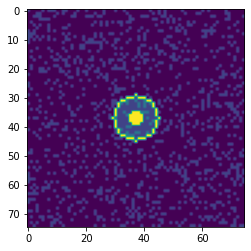

In [ ]:
frame= 0
center = (circles[0,1], circles[0,0])
cv.circle(gray, center, 1, 5, 2)
radius = r_in
cv.circle(gray, center, radius, 5, 1)
plt.imshow(gray)